In [8]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 5)

In [9]:
MEASUREMENTS_PER_SAMPLE = 50
CSV_FILE_PATH = 'gyroscope_data_updated.csv'

def alineData(data):
    def alineDateWithLabel(label, data):
        lable_data = data[data['activity_type'] == label]
        return lable_data[0:lable_data.shape[0] - lable_data.shape[0] % MEASUREMENTS_PER_SAMPLE]
    
    return pd.concat([alineDateWithLabel(label, data) for label in data['activity_type'].unique()])

data = alineData(pd.read_csv(CSV_FILE_PATH))

In [10]:
data.describe()

,x_axis,y_axis,z_axis,ax_axis,ay_axis,az_axis
count,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000
mean,-0.046658,-0.340509,0.215209,0.005065,0.005809,0.002689
std,63.766148,51.340258,64.254881,2.211272,1.749410,2.090554
min,-1261.000000,-503.000000,-1717.000000,-48.000000,-61.000000,-51.000000
25%,-26.000000,-17.000000,-34.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,18.000000,33.000000,1.000000,1.000000,1.000000
max,1007.000000,626.000000,596.000000,41.000000,31.000000,59.000000


In [11]:
data.groupby('activity_type').describe()

ax_axis                                                 \
                 count      mean       std   min  25%  50%  75%   max   
activity_type                                                           
abs            14000.0  0.006286  2.595245 -29.0 -1.0  0.0  2.0  18.0   
gym             6500.0  0.031846  1.316530 -18.0  0.0  0.0  1.0  14.0   
pullups         7100.0  0.005493  2.546726 -42.0  0.0  0.0  1.0  41.0   
pushups        24800.0  0.006613  2.678981 -48.0 -1.0  0.0  1.0  19.0   
situps         24200.0 -0.004545  1.363142 -14.0  0.0  0.0  0.0  10.0   

               ay_axis            ...   y_axis          z_axis            \
                 count      mean  ...      75%    max    count      mean   
activity_type                     ...                                      
abs            14000.0  0.026571  ...     17.0  135.0  14000.0  2.401214   
gym             6500.0  0.001846  ...     11.0  626.0   6500.0 -0.211692   
pullups         7100.0 -0.018451  ...     11.0  547.0   7100.0  1.491831   
pushups        24800.0  0.002379  ...     19.0  536.0  24800.0  0.693952   
situps         24200.0  0.005496  ...     24.0  246.0  24200.0 -1.799917   

                                                          
                     std     min   25%  50%   75%    max  
activity_type                                             
abs            77.142999  -247.0 -58.0  6.0  63.0  296.0  
gym            37.095989 -1717.0 -10.0  0.0  12.0  241.0  
pullups        57.346482  -506.0 -14.0  0.0  13.0  596.0  
pushups        80.870669  -510.0 -59.0  0.0  56.0  436.0  
situps         39.775453  -185.0 -23.0 -2.0  16.0  315.0  

[5 rows x 48 columns]

In [12]:
data.groupby('activity_type').aggregate(np.median)

,x_axis,y_axis,z_axis,ax_axis,ay_axis,az_axis
activity_type,,,,,,
abs,-6,1,6,0,0,0
gym,-2,1,0,0,0,0
pullups,0,-3,0,0,0,0
pushups,1,2,0,0,0,0
situps,0,0,-2,0,0,0


index: 23


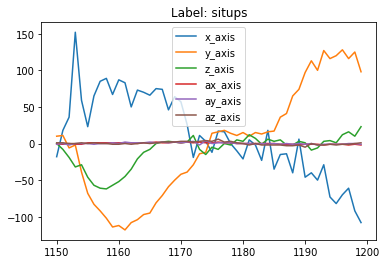

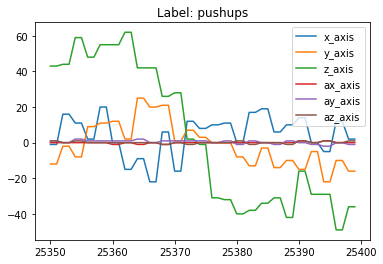

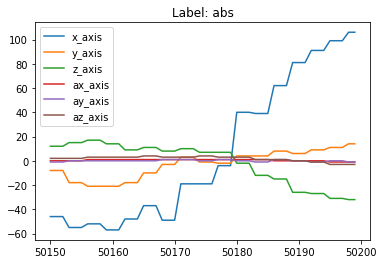

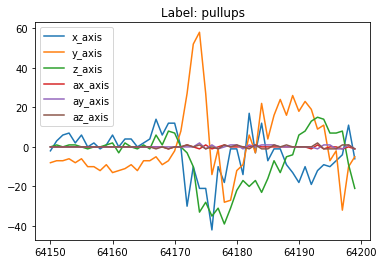

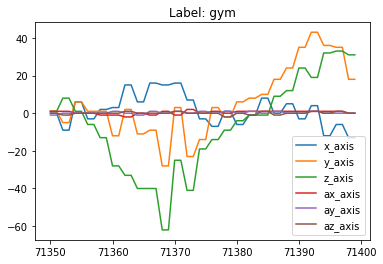

In [14]:
%matplotlib inline
import random

randomIndexToPrint = int(random.random() * (data[data['activity_type'] == 'pullups'].shape[0] // MEASUREMENTS_PER_SAMPLE))

print('index:', randomIndexToPrint)

startIndexToPrint = randomIndexToPrint * MEASUREMENTS_PER_SAMPLE
endIndexToPrint = (randomIndexToPrint + 1) * MEASUREMENTS_PER_SAMPLE

for label in data['activity_type'].unique():
    data[data['activity_type'] == label][startIndexToPrint:endIndexToPrint].plot(title='Label: ' + label)

/Users/aleksey/Main/work_stuff/Python/VirtualEnvs/MachineLeaning/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


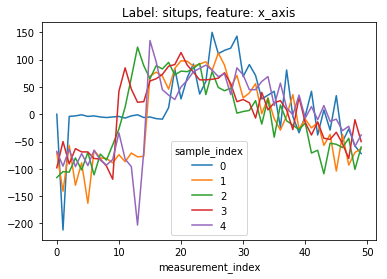

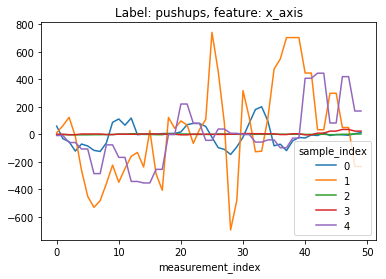

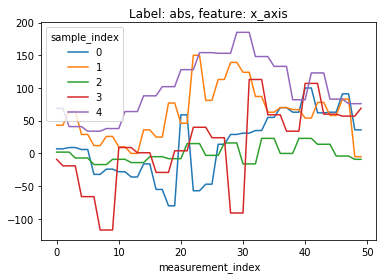

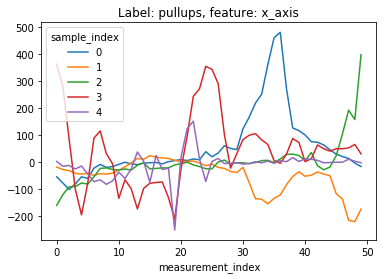

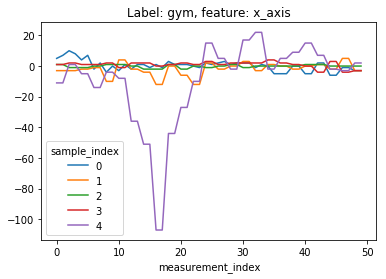

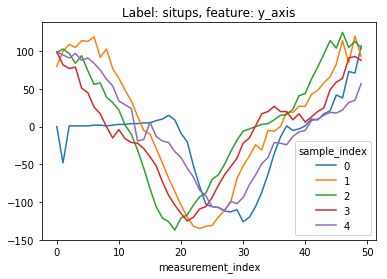

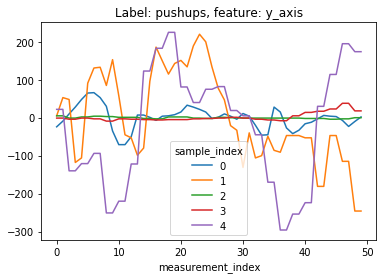

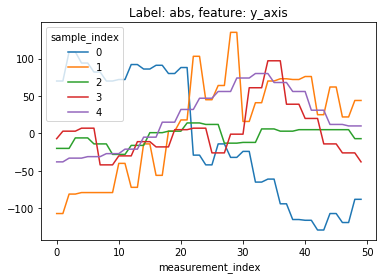

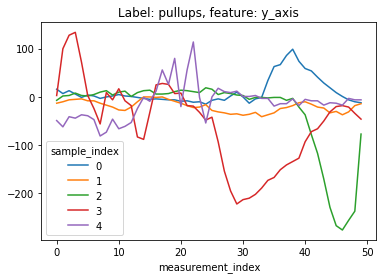

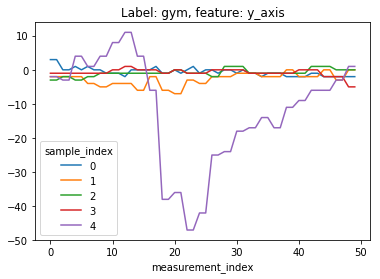

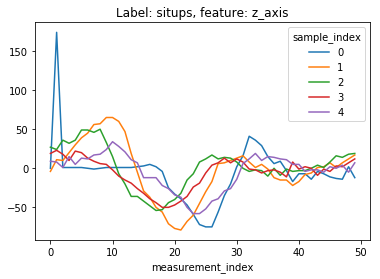

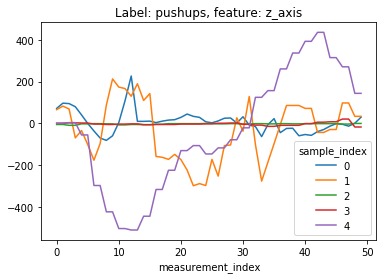

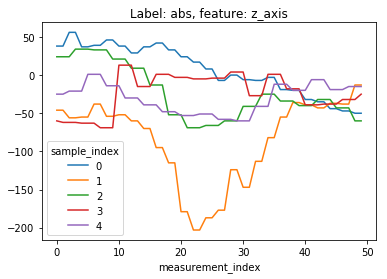

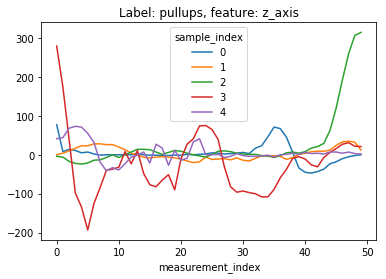

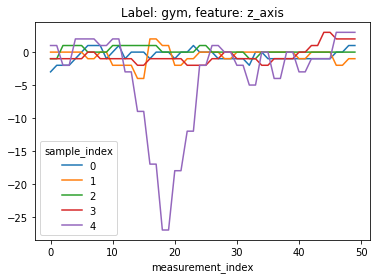

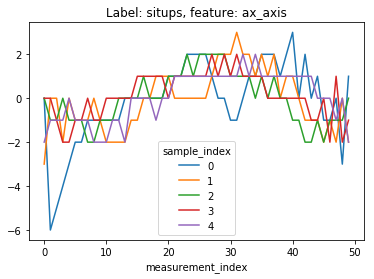

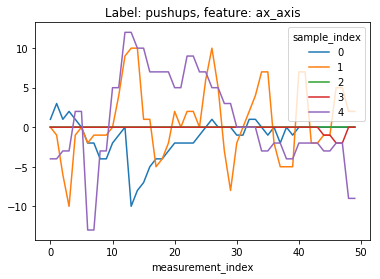

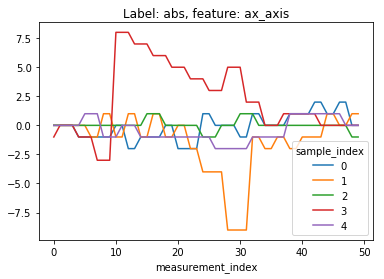

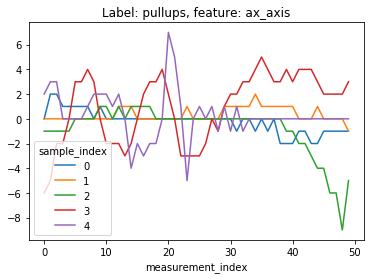

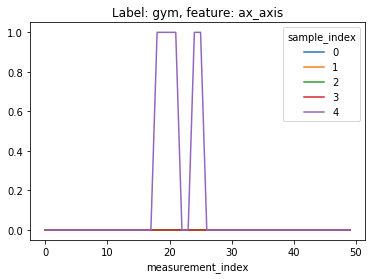

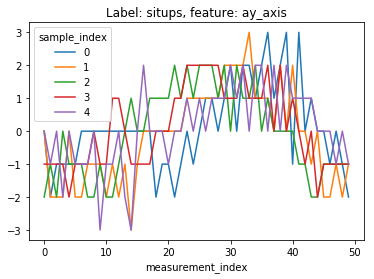

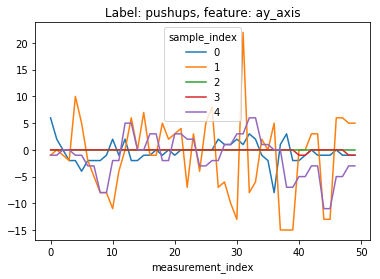

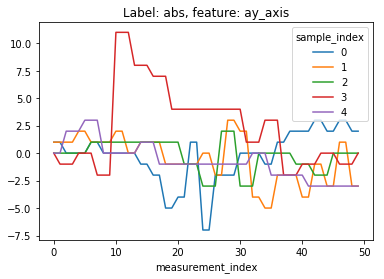

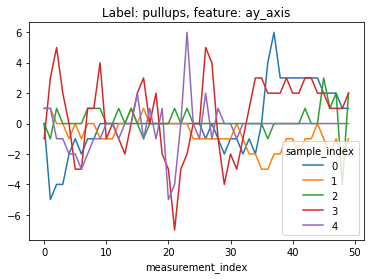

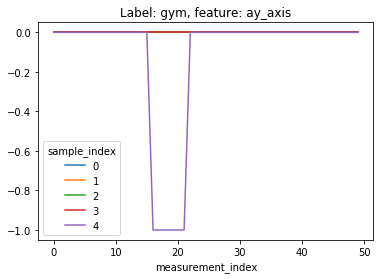

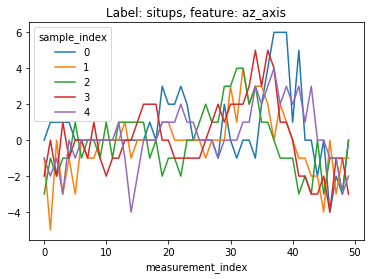

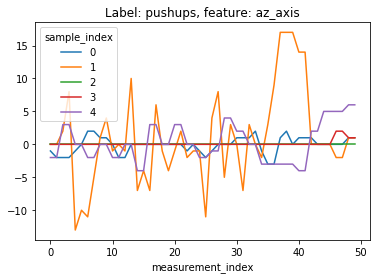

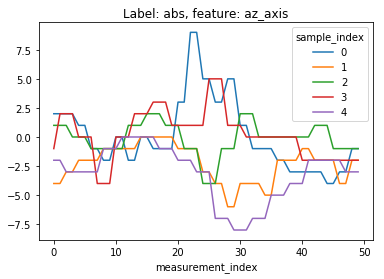

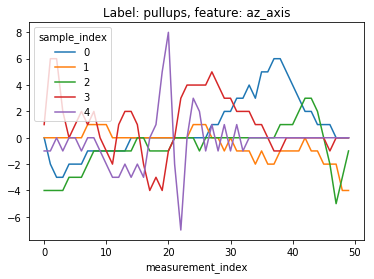

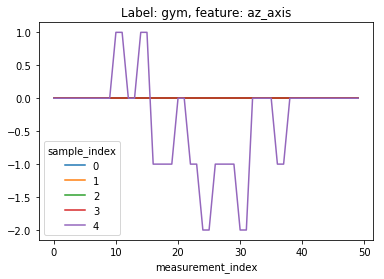

In [15]:
p_data = data.copy()

samples_numbers = 5

def print_feature_per_samples(feature, samples_numbers, data, label):
    p_data = data.copy()
    
    p_data = p_data[p_data['activity_type'] == label][0:samples_numbers * MEASUREMENTS_PER_SAMPLE]

    p_data['measurement_index'] = [index % MEASUREMENTS_PER_SAMPLE for index in range(0, p_data.shape[0])]
    p_data['sample_index'] = [index // MEASUREMENTS_PER_SAMPLE for index in range(0, p_data.shape[0])]

    p_data.pivot(index='measurement_index', columns='sample_index', values=feature).plot(title='Label: ' + label + ', feature: ' + feature)

for feature in data.columns[0:-1]:
    for label in data['activity_type'].unique():
        print_feature_per_samples(feature, samples_numbers, data, label)